In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
#import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # set font size for plots

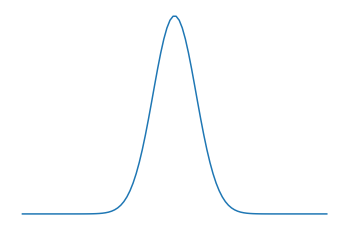

In [4]:
f01=lambda x : np.exp(-x**2)
x=np.linspace(-5,5,100)

plt.plot(x,f01(x))
plt.axis('off')
plt.show()

In [2]:
f = lambda x: np.sin(1.0/x)**2

#np.random.seed(123456)  # used to check; seed always gives same random nubers
n = 2000    # number of guesses
xlim_a= 0.0 
xlim_b= 2.0 
ymax = 1.0
s = 0.0
A = (xlim_b - xlim_a)*ymax 
for i in range(n):
    Rx = (xlim_b - xlim_a)*np.random.ranf() + xlim_a
    Ry = ymax*np.random.ranf()
    if Ry <= f(Rx):
        s = s + 1   # summ to get result
    pass
av_f= A*s/n # estimate
print(av_f)

1.058


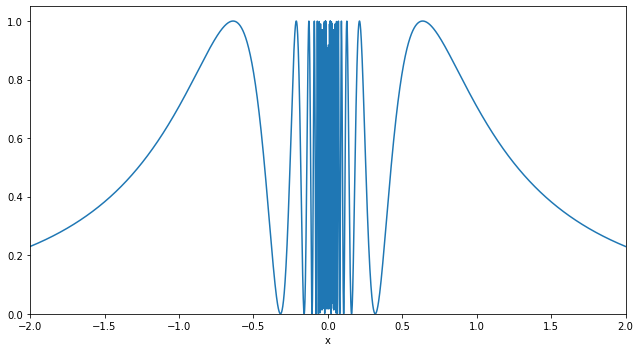

In [3]:

fig1=plt.figure(figsize=(9,5))
f=lambda x: np.sin(1/x)**2

x=np.linspace(-2,2,5000)

plt.plot(x,f(x ) )
plt.xlim(-2,2)
plt.ylim(0,1.05)
plt.xlabel('x')
plt.tight_layout()
#plt.savefig('monte-carlo-fig2.png')
plt.show()

In [4]:
# mean value method

f = lambda x:  np.sin(1/x)**2 
xlim_a = 0.0 
xlim_b = 2.0 
n = 2000
s = 0.0 
s2= 0.0 
for i in range(n):
    x = (xlim_b - xlim_a)*np.random.ranf() + xlim_a 
    s = s + f(x)
    s2= s2+ f(x)**2
    pass
av_f = ( xlim_b - xlim_a )*s/n
av_f2= ( xlim_b - xlim_a )**2*s2/n
sig  = np.sqrt((av_f2 - av_f**2)/n )
print('{:8.4f} {:s} {:8.4f}'.format( av_f, '+/-',  sig ) )

  1.0651 +/-   0.0125


In [5]:
f,x =symbols('f x')
f=sin(1/x)**2
ans= integrate(f,(x,0,2) )

In [6]:
ans.evalf()

In [7]:
ans

In [8]:
# question 1   mean value 
f = lambda x:  np.sin(x**2)*np.exp(-x)
xlim_a = 0.0 
xlim_b = 6.0 
n = 20000
s = 0.0 
s2= 0.0 
for i in range(n):
    x = (xlim_b - xlim_a)*np.random.ranf() + xlim_a 
    s = s + f(x)
    s2= s2+ f(x)**2
    pass
av_f = ( xlim_b - xlim_a )*s/n
av_f2= ( xlim_b - xlim_a )**2*s2/n
sig  = np.sqrt((av_f2 - av_f**2)/n )
print('{:8.4f} {:s} {:8.4f}'.format( av_f, '+/-',  sig ) )

  0.2669 +/-   0.0045


In [131]:
# question 5   mean value 


ans=[]

f = lambda x,g:  x**g
xlim_a = 0.0 
xlim_b = 1.0 
g = -0.8

n = 20001

num = 1000
m =np.logspace(3,6,num)
for j in range(num):
    s = 0.0 
    s2= 0.0 
    n=int(m[j])
    for i in range(n):
        x = (xlim_b - xlim_a)*np.random.ranf() + xlim_a 
        s = s + f(x,g)
        s2= s2+ f(x,g)**2
        pass
    av_f = ( xlim_b - xlim_a )*s/n
    av_f2= ( xlim_b - xlim_a )**2*s2/n
    sig  = np.sqrt((av_f2 - av_f**2)/n )
    ans.append(av_f)
    #print('{:d} {:8.4f} {:s} {:8.4f}'.format(n, av_f, '+/-',  sig ) )
    pass

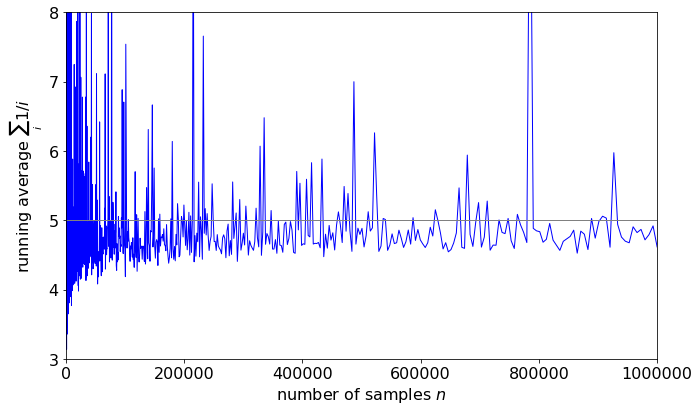

In [136]:
fig1=plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots


#plt.scatter(m,ans,s=5)
plt.plot(m,ans,linewidth=1,color='blue')
plt.ylim([3,8])
plt.xlim([0,1e6])
plt.axhline(5,linewidth=1,color='grey')
plt.xlabel('number of samples '+r'$n$')
plt.ylabel('running average '+r'$\sum_i 1/i$')
plt.tight_layout()
#plt.savefig('monte-carlo-fig20a.png')
plt.show()

In [10]:
# question 6   mean value 

eps = 140     # cm^(-1)
sig = 0.3943  # nm
kB  = 0.693   # cm^(-1)/K 
T   = 300

f = lambda r:  (1-np.exp(-U(r)/(kB*T)) )*r**2
U = lambda r: 4*eps*( (sig/r)**12 - (sig/r)**6 )
xlim_a = 0.0 
xlim_b = 2.0 
n = 30000
s = 0.0 
s2= 0.0 
for i in range(n):
    x = (xlim_b - xlim_a)*np.random.ranf() + xlim_a 
    s = s + f(x)
    s2= s2+ f(x)**2
    pass
av_f = ( xlim_b - xlim_a )*s/n
av_f2= ( xlim_b - xlim_a )**2*s2/n
sig  = np.sqrt((av_f2 - av_f**2)/n )
print('{:8.4f} {:s} {:8.4f}'.format( av_f, '+/-',  sig ) )

 -0.0256 +/-   0.0006


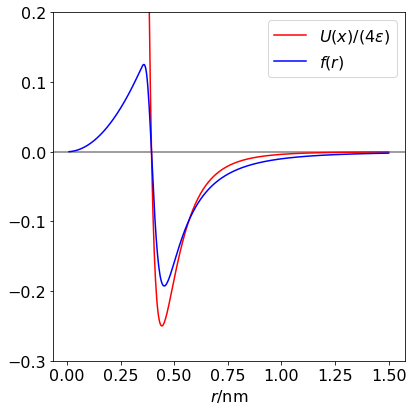

In [11]:
fig1=plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots

x = np.linspace(0.01,1.5,500)

eps = 140     # cm^(-1)
sig = 0.3943  # nm
kB  = 0.693   # cm^(-1)/K 
T   = 300

f = lambda r: r**2*(  1.0 - np.exp(-U(r)/(kB*T)  )   )
U = lambda r: 4*eps*( (sig/r)**12 - (sig/r)**6 )

plt.axhline(0,color='grey')
plt.plot(x,U(x)/(4*eps),color='red',label=r'$U(x)/(4\epsilon)$')
plt.plot(x,f(x),color='blue',label=r'$f(r)$')
plt.ylim(-0.3,0.2)
plt.xlabel(r'$r$/nm')


plt.legend()
plt.tight_layout()

#plt.savefig('monte-carlo-fig21.png')
plt.show()


In [12]:
# Algorithm 3 Importance Sampling Monte Carlo Integration using p(x)=kexp(-kx) 
f = lambda x: np.exp(-x**2)         # function to integrate
p = lambda x: np.exp(-k*x)          # sampling function
k = 1.0                             # constant and limits 
a = 0.0 
b = 2.0
c = np.exp(-k*a) - np.exp(-k*b)     # constant in r=It/N
N = (np.exp(-k*a) - np.exp(-k*b))/k # normalisation 
s = 0.0                             # summation
s2= 0.0
n = 10000                            # number of trials
for i in range(n):
    t = -np.log( 1.0-np.random.ranf()*c)/k   # get random value
    Q = N*f(t)/p(t)                 # get sampled  values eqn 7
    s = s + Q 
    s2= s2 + Q**2
    pass

av_f = s/n                          # average of integration 
av_f2= s2/n                         # average **2
std_dev= np.sqrt((av_f2-av_f**2)/n)
print('{:s} {:f}{:s} {:f} '.format( 'integral =',av_f,'+/ -',std_dev ) )

integral = 0.883249+/ - 0.002658 


In [13]:
# Q3  Importance Sampling Monte Carlo Integration using p(x)=kexp(-kx) 
f = lambda x: np.exp(-x) *np.sin(x**2)        # function to integrate
p = lambda x: np.exp(-k*x)          # sampling function
k = 1.0                             # constant and limits 
a = 0.0 
b = 10.0
c = np.exp(-k*a) - np.exp(-k*b)     # constant in It/N=r
N = (np.exp(-k*a) - np.exp(-k*b))/k # normalisation 
s = 0.0                             # summation
s2= 0.0
n = 20000                            # number of trials
for i in range(n):
    t = -np.log( 1.0-np.random.ranf()*c)/k   # get random value
    Q = N*f(t)/p(t)                 # get sampled  values eqn 7
    s = s + Q 
    s2= s2 + Q**2
    pass

av_f = s/n                          # average of integration 
av_f2= s2/n                         # average **2
std_dev= np.sqrt((av_f2-av_f**2)/n)
print('{:s} {:f}{:s} {:f} '.format( 'integral =',av_f,'+/ -',std_dev ) )

integral = 0.269142+/ - 0.003357 


In [14]:

# Q5   Importance Sampling Monte Carlo Integration using x**L
f = lambda x: x**g        # function to integrate
p = lambda x: x**L          # sampling function
g = -0.8                   # constant and limits
L = g-0.01
a = 0.0 
b = 10.0
c = np.exp(-k*a) - np.exp(-k*b)     # constant in It/N=r
N = 1/(1+L) # normalisation 
s = 0.0                             # summation
s2= 0.0
n = 1000                            # number of trials
for i in range(n):
    t = np.random.ranf()**(1/(L+1) )   # get random value
    Q = N*f(t)/p(t)                 # get sampled  values eqn 7
    s = s + Q 
    s2= s2 + Q**2
    pass

av_f = s/n                          # average of integration 
av_f2= s2/n                         # average **2
std_dev= np.sqrt((av_f2-av_f**2)/n)
print('{:s} {:f}{:s} {:f} '.format( 'integral =',av_f,'+/ -',std_dev ) )

integral = 5.000681+/ - 0.008049 
